## Assignment NO.18-1

### Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
df=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [ ]:
# We will extract Quarter values and Year values separately from 'Quarter column'
df['Quarters'] = 0
df['Year'] = 0
for i in range(42):
    p = df["Quarter"][i]
    df['Quarters'][i]= p[0:2]
    df['Year'][i]= p[3:5]
df.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [ ]:
# Getting dummy variables for Quarters
Quarters_Dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df = pd.concat([df,Quarters_Dummies],axis = 1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


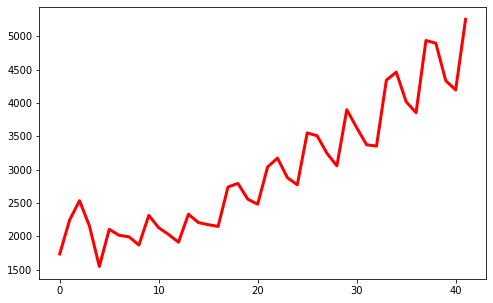

In [ ]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(df['Sales'], color = 'red', linewidth=3)

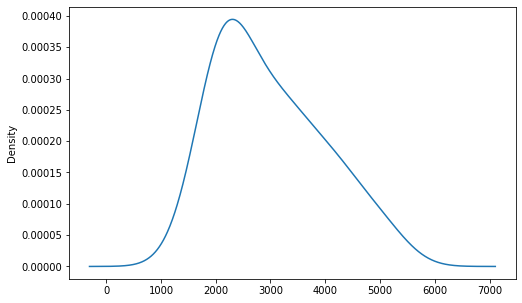

In [ ]:
# Density Plot
df['Sales'].plot(kind = 'kde', figsize=(8,5))

**Data Driven Forecasting Methods**

In [ ]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [ ]:

Train = df.head(32)
Test = df.tail(10)

Moving Average Method

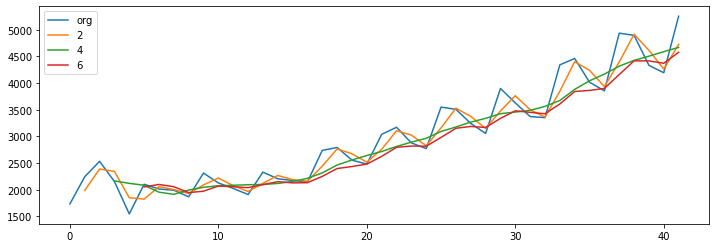

In [ ]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,8,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition plot

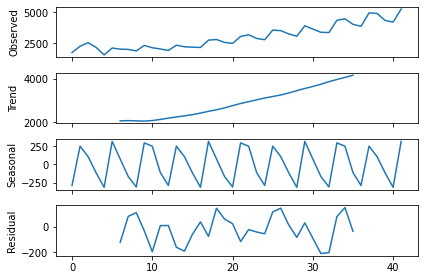

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Sales,freq=12)
decompose_ts_add.plot()
plt.show()

Evaluation Metric RMSE

In [ ]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse


In [ ]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1034.93595824256

Holt method

In [ ]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

532.9960173912473

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

534.4407129730668

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

533.2777786860714

Model based Forecasting Methods

In [ ]:
# Data preprocessing for models
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]

df["log_sales"] = np.log(df["Sales"])

df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


Splitting data

In [ ]:
Train = df.head(32)
Test = df.tail(10)

Linear Model

In [ ]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767116

Exponential Model

In [ ]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076487

Quadratic Model

In [ ]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.73573554074454

Additive Seasonality model

In [ ]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.4665461858349

Additive Seasonality Quadratic model

In [ ]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model

277.3510771128766

Multiplicative Seasonality model

In [ ]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.250394836113

Multiplicative Additive Seasonality model

In [ ]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.8678182691893

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear_model","rmse_Exp_model","rmse_Quad_model","rmse_add_sea","rmse_add_sea_Quad_model","rmse_Mul_sea","rmse_Mul_Add_sea"]),"RMSE_Values":pd.Series([rmse_linear_model,rmse_Exp_model,rmse_Quad_model,rmse_add_sea,rmse_add_sea_Quad_model,rmse_Mul_sea,rmse_Mul_Add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_Quad_model,277.351077
6,rmse_Mul_Add_sea,448.867818
2,rmse_Quad_model,457.735736
1,rmse_Exp_model,590.331643
0,rmse_linear_model,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mul_sea,1908.250395


***Building final model with least RMSE value***

There is Trend and Seasonality in data

In [ ]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=df).fit()
pred_final = pd.Series(final_model.predict(df[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(df['Sales'], pred_final)
rmse_final_model

159.05522576522475

In [ ]:
pred_df = pd.DataFrame({'Actual' : df.Sales, 'Predicted' : pred_final})
pred_df.head()

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
